# 이미지 불러오기

In [1]:
#############숫자 두르는 테두리 만들기 ###############

import cv2
import sys
import math
import cv2 as cv
import numpy as np
from time import sleep
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
#색깔의 범주 설정(추후에 사용할까 해서 적은 두 줄) ->현재코드에는 영향을 주지 x
black1 = np.array([0, 0, 0])  # 검정색 최솟값
black2 = np.array([20, 20, 20])  # 검정색 최댓값

name ="C:/Users/tmdwh/Desktop/8.jpg" #이미지 파일 하나 로딩

img = cv2.imread(name , cv2.IMREAD_COLOR) #이미지와 코드가 한 파일에 있어야 함(혹은 위에 경로로 초기화 해주기)
#처리에 사용할 이미지


# 작업이미지를 이진화 시키기

In [31]:
# 모폴로지(dilate->팽창연산 적용: 글자 잡음 제거 , erode -> 침식연산 적용 :글자 주변 잡음 제거)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2)) #구조화 요소 커널, 사각형 (3x3) 생성
ero_img = cv2.erode(img, k)

imgray = cv2.cvtColor(ero_img, cv2.COLOR_BGR2GRAY) #이거 안하면 이진화 불가

#cam = cv2.GaussianBlur(imgray, (3, 3), 0)  # 가우시안 블러 -> 불필요하다 생각

ret, img_binary = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 이진화
#cv2.threshold(src, thresh, maxval, type) → retval, dst
#src => input image(gray scale image), thresh=>임계값 (이하면 흰색 아니면 검정색)-> 이 경우 255/2
#maxval ->임계값이상 나왔을때 적용할 값 -> 255 (검정)

ret, img_final_binary = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 원본 이진화

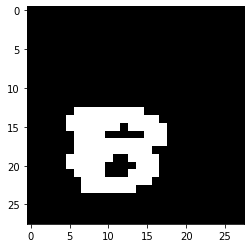

In [32]:
plt.imshow(img_final_binary, cmap=mpl.cm.binary)

# 작업이미지 반전 처리

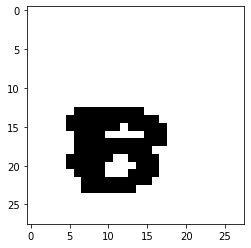

In [33]:
vers_img = 255 - img_binary #(이미지를 반전 처리 해줌) -> 컨투어(사각형 그리기)는 흰색을 기준으로 그리기 때문

plt.imshow(vers_img, cmap=mpl.cm.binary)

In [34]:
contours, hierarchy = cv2.findContours(vers_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)  # 컨투어
#반전된 이미지로 컨투어를 진행

if len(contours) == 0:
    print("컨투어 0") #컨투어를 하지 못한 -> 이미지 파일 손상 등등의 문제

else:
    contr = contours[0]
    x, y, w, h = cv2.boundingRect(contr)  # 최소한의 사각형 그려주는 함수
    cv2.rectangle(img_binary, (x, y), (x + w, y + h), (0, 255, 0), 3) #(x,y)->왼쪽 하단 꼭지점, (x+w,y+h)-> 오른쪽 상단 꼭지점   
    # w: 사각형의 width, h: 사각형의 high  x: 왼쪽 아래 꼭지점의 x좌표  y: 오른쪽 위 꼭지점의 y좌표 
    # 사각형을 img_binary에 그려 주었다 -> 사각형 추후 처리해야 한다 아니면 숫자가 바뀜
    print(" x = %d, w = %d" % (x, w))
    print(" y = %d, h = %d" % (y, h))
    x_mid = x + w/2
    y_mid = y + h/2
    print(" 가로 중간값 = %f" % (x_mid))
    print(" 세로 중간값 = %f" % (y_mid))
    

cv.imshow("Original_image", img)  # 원본파일
cv.imshow("Thresh_binary", img_binary)  #수정파일

 x = 5, w = 13
 y = 13, h = 11
 가로 중간값 = 11.500000
 세로 중간값 = 18.500000


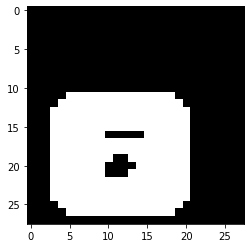

In [35]:
#확인 작업
plt.imshow(img_binary, cmap=mpl.cm.binary)

In [36]:
img_binary.size

784

# 도화지 만들기 -> 결과로 사용 

In [37]:
final_img = [[0 for col in range(28)] for row in range(28)]
for i in range (28):
    for j in range (28):
        final_img[i][j] = 255

In [38]:
final_img #도화지

[[255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
 

# 작업할 도화지2개 만들기

In [39]:
cpy_img,cpy_img2 = [[0 for col in range(28)] for row in range(28)], [[0 for col in range(28)] for row in range(28)]
for i in range (28):
    for j in range (28):
        cpy_img[i][j],cpy_img2[i][j] = 255,255

# 가운데 정렬 시키기(좌우)

In [40]:
import math
x_er = math.floor(x_mid -14)
y_er = math.floor(y_mid -14)
print(x_er)
if x_mid !=  14 : # 숫자가 좌우 쏠림
    for i in range (27):
        for j in range (27):
            if img_final_binary[i][j] == 0: #데이터가 있으면 
                cpy_img2[i][j-round(x_er)] = 0               

-3


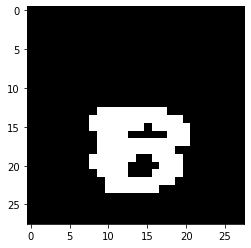

In [41]:
plt.imshow(cpy_img2, cmap=mpl.cm.binary)

# 가운데 정렬시키기(상하) -> 완성본 이므로 final_img에 그리기

In [42]:
if y_mid !=  14 : # 숫자가 좌우 쏠림
    for i in range (28):
        for j in range (28):
            if cpy_img2[j][i] == 0: #데이터가 있으면 
                final_img[j-round(y_er)][i] = 0   
else: #이미 상하정렬되어 있으면 
    for i in range (28):
         for j in range (28):
            final_img[i][j] = cpy_img2[i][j] #deep copy

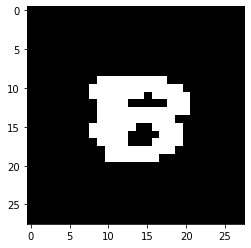

In [43]:
plt.imshow(final_img, cmap=mpl.cm.binary)

In [44]:
final_img[10][15]

0